# PRJNA741211 - Baaijens et al.

Article link: https://genomebiology.biomedcentral.com/articles/10.1186/s13059-022-02805-9

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})


In [2]:
coco <- read.csv(
    here("data", "processed", 
        "PRJNA741211_processed.csv.gz")
)
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,ww_population
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>
1,17837,+17838.T,ins:17838:1,0.000000000,4217,0,SRR15505102,2021-01-19,DU1,302,585534814,PRJNA741211,200000
2,23331,+23332.T,ins:23332:1,0.000000000,14912,0,SRR15505102,2021-01-19,DU1,302,585534814,PRJNA741211,200000
3,3531,+3532.T,ins:3532:1,0.000000000,1771,0,SRR15505102,2021-01-19,DU1,302,585534814,PRJNA741211,200000
4,11074,-11075.1,del:11075:1,0.006896552,435,3,SRR15505102,2021-01-19,DU1,302,585534814,PRJNA741211,200000
5,11082,-11083.1,del:11083:1,0.000000000,434,0,SRR15505102,2021-01-19,DU1,302,585534814,PRJNA741211,200000
6,11267,-11268.2,del:11268:2,0.000000000,510,0,SRR15505102,2021-01-19,DU1,302,585534814,PRJNA741211,200000


In [3]:
lineages_in_paper <- c("B.1.1.7", "B.1.351", 
    "B.1.427", "B.1.429", "P.1")
barcodes <- provoc::usher_barcodes()
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
rownames(barcodes)


[1] "B.1.1.7" "P.1"     "B.1.427" "B.1.351" "B.1.429"

In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


   user  system elapsed 
  2.581   0.014   2.663 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,ww_population
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>
1,8.633508e-03,NA,NA,B.1.1.7,SRR15505102,2021-01-19,DU1,302,585534814,PRJNA741211,200000
2,1.103462e-01,NA,NA,P.1,SRR15505102,2021-01-19,DU1,302,585534814,PRJNA741211,200000
3,4.343153e-10,NA,NA,B.1.427,SRR15505102,2021-01-19,DU1,302,585534814,PRJNA741211,200000
4,4.928044e-01,NA,NA,B.1.351,SRR15505102,2021-01-19,DU1,302,585534814,PRJNA741211,200000
5,2.458236e-01,NA,NA,B.1.429,SRR15505102,2021-01-19,DU1,302,585534814,PRJNA741211,200000
6,5.748059e-03,NA,NA,B.1.1.7,SRR15505103,2021-01-17,DS2,302,484944654,PRJNA741211,200000


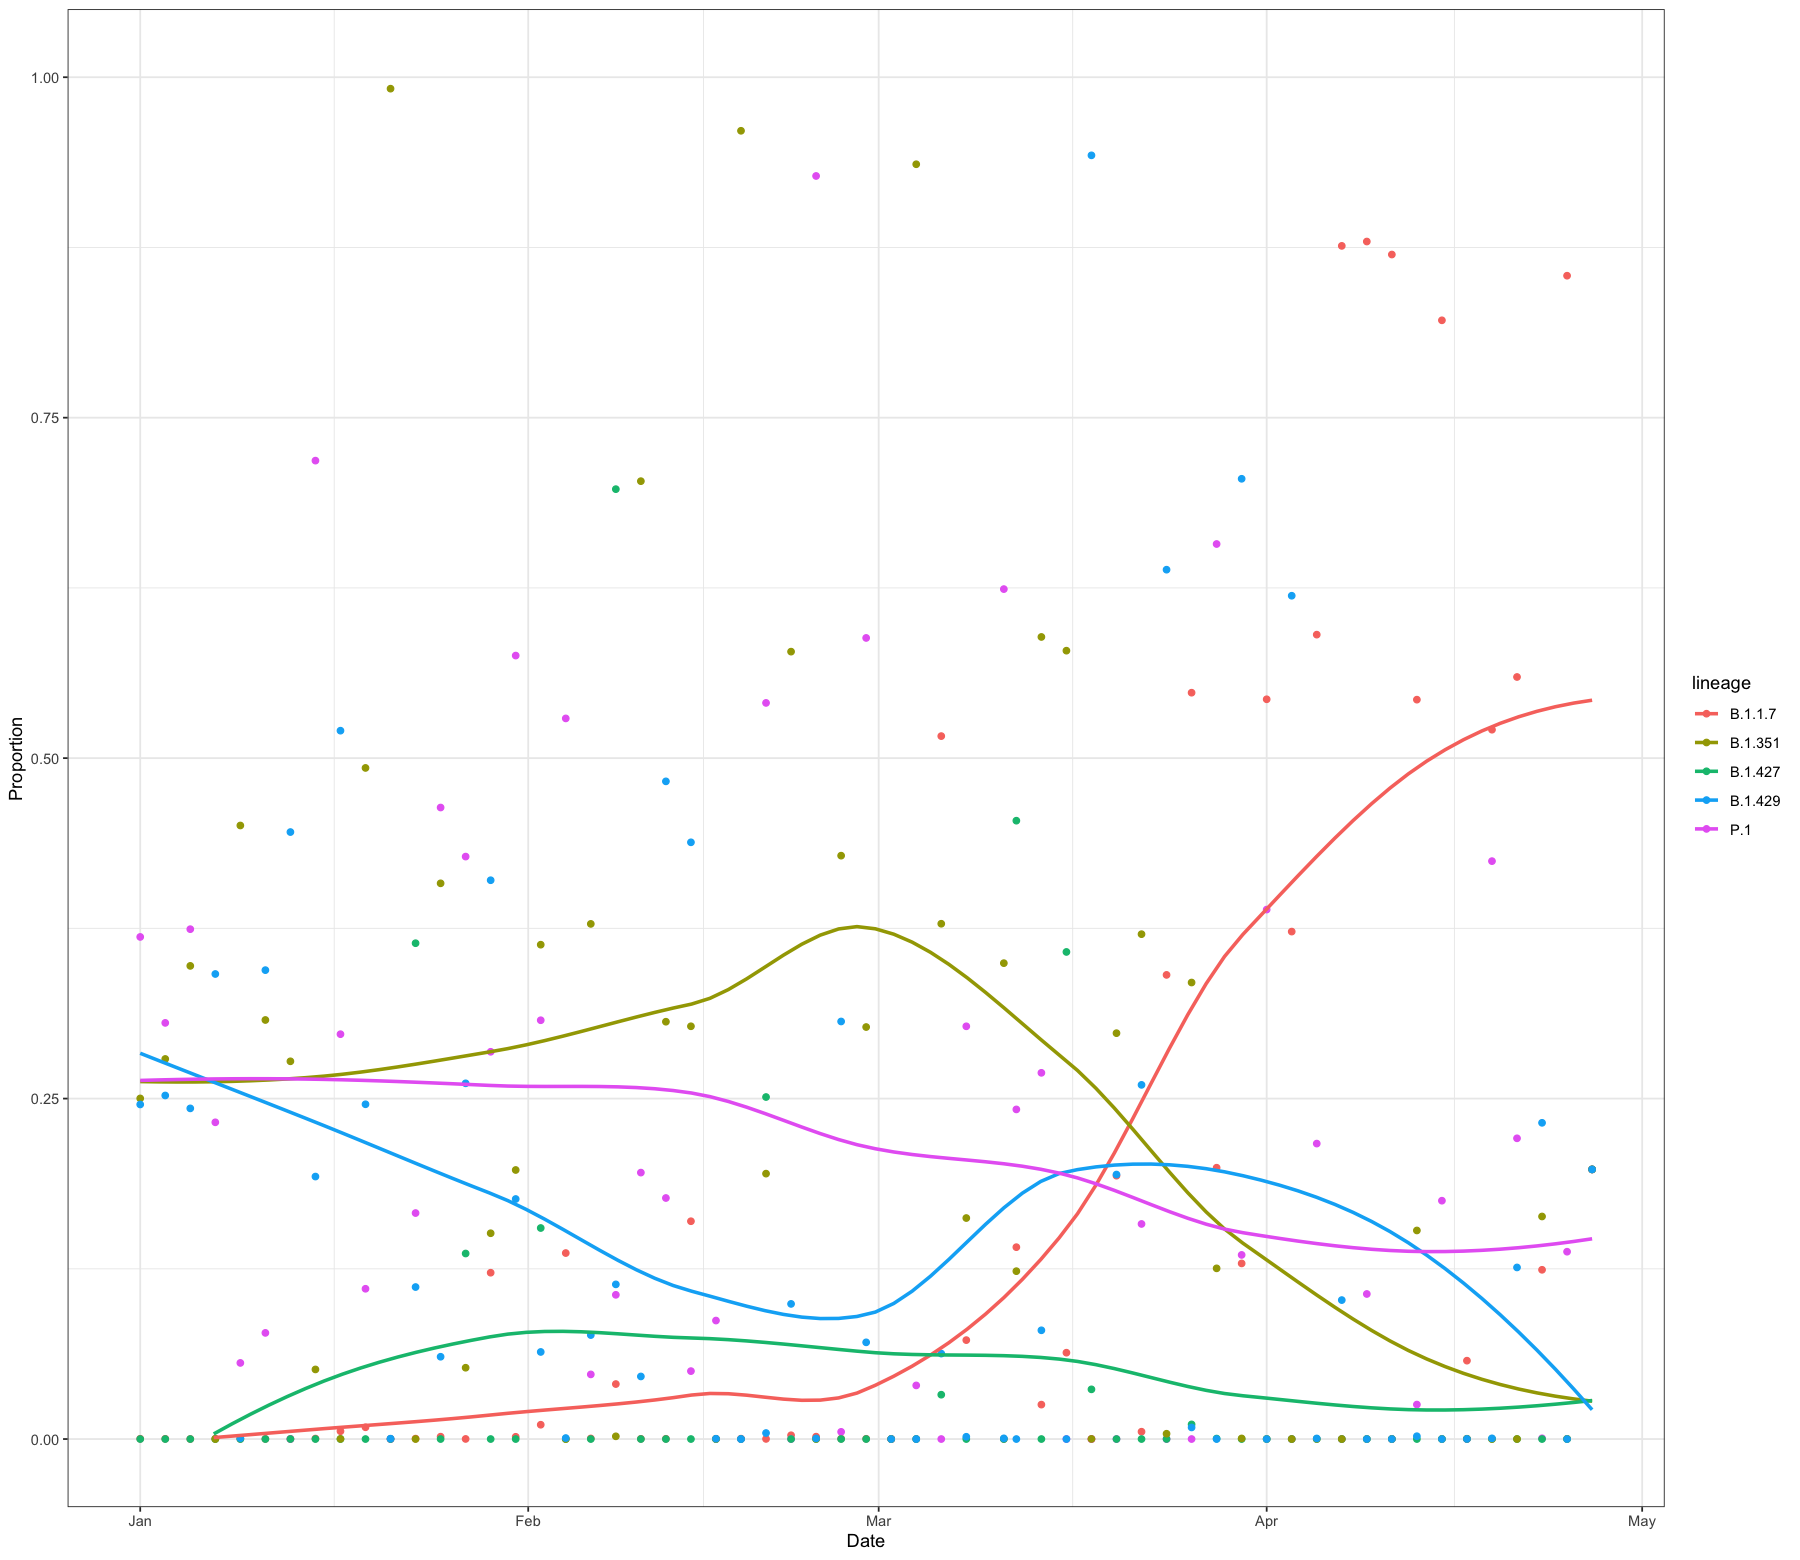

In [5]:
options(repr.plot.width = 15, repr.plot.height = 13)

res$date <- lubridate::ymd(res$date)

gg <- autoplot(res, date_col = "date") +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
